<a href="https://colab.research.google.com/github/buttersaltpepper/Financial-Data-Analytics/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN from scratch and Case Studies**

## **Advantages**
* Works well with **small datasets with less number of features**.
* Works on **both Classification & Regression**
* Easy for **multi-class** classification problems
* Flexible (difference distance)

## **Disadvantages**
* **Less efficient with high dimensions** not good
* Need to choose **optimum K**
* Doesn't perform well on **imbalanced dataset**
  * *Class has 300 dog's but 20 cats*
* Distance based so **extremely sensitive to outliers**


## **Euclidean Distance**
**pythagoras theorem**

$d = \sqrt{(x_i - x_0)^2 + (y_1 - y_0)^2 + (z_1 - z_0)^2}$



$d(x,y) = \sqrt{\sum_{i=1}^n (y_i - x_i)}$

## **Manhattan Distance**

**Manhattan distance is usually preferred over the more common Euclidean distance when there is high dimensionality in the data.**
$d = |x_1 - x_2| + |y_1 - y_2|$

## **Creating KNN class**
*Help from youtube😁*

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class KNearestNeighbor:

  def __init__(self, n_neighbors=5, p=2): # p is order of 
    self.n_neighbors = n_neighbors
    self.p = p

  def fit(self, X, y):
    self.X = X
    self.y = y
    return self

  def predict(self, X):
    predictions = []

    for pred_row in X:
      euclidean_distances = []
      self.confidence = []
      for X_row in self.X:
        distance = np.linalg.norm(X_row - pred_row, ord=self.p) # calculates distance of all
        euclidean_distances.append(distance) 


      # np.argsort() to return Index of sorted distances
      # [:self.n_neighbors] to find the K nearest points
      neighbors = self.y[np.argsort(euclidean_distances)[:self.n_neighbors]]

      # np.bincount() to count occurnce of each value in array
      neighbors_bc = np.bincount(neighbors)

      # finds which class it belongs to by majority
      prediction = np.argmax(neighbors_bc)

      # returns index with highest value
      predictions.append(prediction)

      # Confidence of K.  By dividing majority K by total K's
      self.confidence.append(neighbors[prediction]/len(neighbors))

    return predictions

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

In [ ]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =4)

In [ ]:
# initiate KNN object model
knn = KNearestNeighbor()

# Fit and predict
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

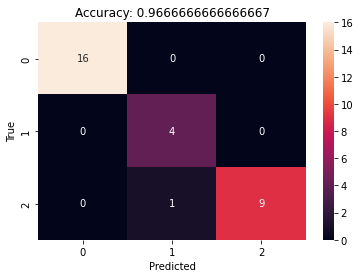

In [ ]:
# Model evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_pred, y_test)


sns.heatmap(cm, annot=True).set(title=f"Accuracy: {acc}")
plt.xlabel('Predicted');
plt.ylabel('True');

# **Case Study: Will a purchase be made?**


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot

In [ ]:
df =pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/ML-USU-SP21/main/Classes/Class%2013-%20KNN%20(Python)/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Data is small and not high dimension features. So KNN would work

# MUST scale for Distance based models!
# Example: Month - 1,2,3,4...to 12, this makes KNN pretty bad because high dimension

In [ ]:
pd.crosstab(df.Purchased, df.Purchased, normalize='all')*100

Purchased,0,1
Purchased,,
0,64.25,0.00
1,0.00,35.75


## Data preprocessing

In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# Drop ID column, turn category variables into dummy codes
df.drop('User ID', axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

# reorder to make it clean
df = df[['Purchased', 'Age', 'EstimatedSalary', 'Gender_Male']]

df.head()

,Purchased,Age,EstimatedSalary,Gender_Male
0,0,19,19000,1
1,0,35,20000,1
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,1


In [ ]:
print(df.groupby('Purchased')['Age'].mean())

print(df.groupby('Purchased')['EstimatedSalary'].mean())


Purchased
0    32.793774
1    46.391608
Name: Age, dtype: float64
Purchased
0    60544.747082
1    86272.727273
Name: EstimatedSalary, dtype: float64


## ANOVA tests

In [ ]:
# AVOVA
from scipy import stats

In [ ]:
for col in df[['Age', 'EstimatedSalary']]:

  long_list = df.groupby('Purchased')[col].apply(list)

  f,p = stats.f_oneway(*long_list)
  print(col) 
  print('f-stat: ', round(f,3), 'p-stat: ',round(p,6))

Age
f-stat:  251.742 p-stat:  0.0
EstimatedSalary
f-stat:  60.053 p-stat:  0.0


Based on ANOVA results and significant difference from Age and EstimatedSalary, we can expect **Age** and **EstimatedSalary** to have predicitve powers

## Scaling features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,Purchased,Age,EstimatedSalary,Gender_Male
0,-0.745936,-1.781797,-1.490046,1.020204
1,-0.745936,-0.253587,-1.460681,1.020204
2,-0.745936,-1.113206,-0.785290,-0.980196
3,-0.745936,-1.017692,-0.374182,-0.980196
4,-0.745936,-1.781797,0.183751,1.020204


In [ ]:
# Gender & Purchased should not be scaled!
df_sc.Gender_Male = df.Gender_Male
df_sc.Purchased = df.Purchased
df_sc.head()

,Purchased,Age,EstimatedSalary,Gender_Male
0,0,-1.781797,-1.490046,1
1,0,-0.253587,-1.460681,1
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,0,-1.781797,0.183751,1


## Define variables and splitting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df_sc.Purchased
X = df_sc.drop('Purchased', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

X_train.head()

NameError: ignored

## KNN CLassification with Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Fit model to training set
knn = KNeighborsClassifier(n_neighbors=5) # can change distance: default is euclidean
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Prediction
y_hat = knn.predict(X_test) # output are probabilities
y_hat_probs = knn.predict_proba(X_test)[:,1] # Pull the probability of Positive (1)

# Default threshold 0.5

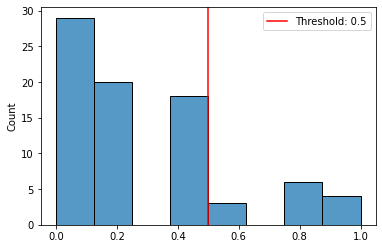

In [ ]:
plt.axvline(x=0.5, color='red', label='Threshold: 0.5')
plt.legend()
sns.histplot(x=y_hat_probs);

Dataset is relatively balanced and so 0.5 threshold seems fair point.


If threshold increase = more strict = less false positive, 

If threshold decrease = more conservative = less false postive, but more false negative


**Which threshold is optimal? - this depends on another defined function such as Profit**

In [ ]:
y_hat_30 = np.where(y_hat_probs > 0.3,1,0)
y_hat_70 = np.where(y_hat_probs > 0.7,1,0)

In [ ]:
df_predictions = pd.DataFrame({'y_test': y_test, 'y_hat_probs': y_hat_probs,
                              'y_hat_30': y_hat_30, 'y_hat_70': y_hat_70})

df_predictions.head()

,y_test,y_hat_probs,y_hat_30,y_hat_70
248,0,0.0,0,0
318,1,0.4,1,0
173,0,0.0,0,0
285,1,0.8,1,1
184,0,0.2,0,0


## Performance metrics

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score 


### Confusion matrix

In [ ]:
print(confusion_matrix(y_test, y_hat))

[[48  1]
 [19 12]]


### Built-in Classification report

In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83        49
           1       0.92      0.39      0.55        31

    accuracy                           0.75        80
   macro avg       0.82      0.68      0.69        80
weighted avg       0.80      0.75      0.72        80



## ROC and AUC


No Skill: ROC AUC=0.500
KNN: ROC AUC=0.829


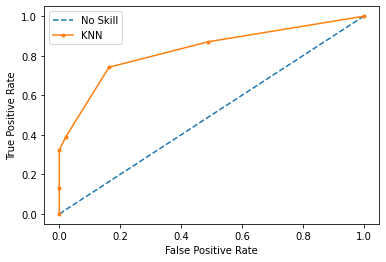

In [ ]:
# generate a no skill (ns) prediction and KNN  (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = knn.predict_proba(X_test)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Interpretation:**


KNN model is good fit. 

ROC of KNN is up in .829, so we are getting lots of True positives and lowers false postiive rate

## Choosing K with Error Rate

In [ ]:
error_rate = []
k = 50

for i in range(1,k): # from K1 to K50
  KNN_i = KNeighborsClassifier(n_neighbors=i)
  KNN_i.fit(X_train, y_train)

  # finding any misclasifications and calculate the average
  # This is the FN + FP OF THE TEST SET. because were evaluation our training model on test sets
  error_rate.append(np.mean(y_test != KNN_i.predict(X_test))) 

# Get index of lowest error_rate
lowest_er = np.argmin(error_rate)+1

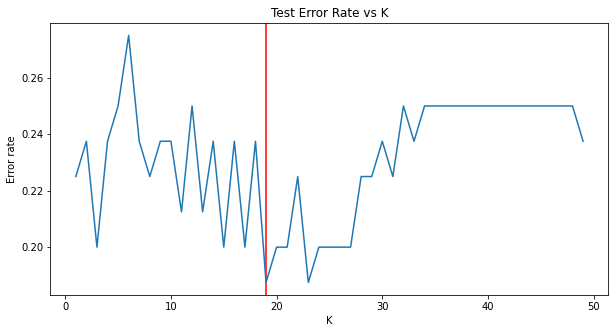

In [ ]:
plt.figure(figsize=(10,5))
plt.axvline(x=lowest_er, color='r')
sns.lineplot(y=error_rate, x=range(1,k))
plt.title('Test Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

**Whats wrong with picking K like this?**

This is the error rate in the **train set** so this is cheating!
* over-fitting!
* so **cross-validation** may be better.

## Cross Validation

In KNN, use cross validation to find optimal K
**Reasons why:**
1. Estimate accuracy (or error rate) of test set by doing cross-valdiation
2. **Most important:** For Tuning hyperparameter

In [ ]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics 

In [ ]:
# error_rate
accuracy = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=5, scoring='accuracy')

error_rate = round((1-accuracy).mean(),4)
error_rate

0.1781

In [ ]:
error_rate_test = []
error_rate_CV=[]
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    accuracy =  cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5 , scoring="accuracy")
    error_rate_CV.append(np.mean(1-accuracy))
    error_rate_test.append(np.mean(y_test != KNN_i.predict(X_test)) )
    
optimal_k = pd.DataFrame({'error_rate_CV': error_rate_CV, 
                          'error_rate_test':error_rate_test}, index=range(1,k))

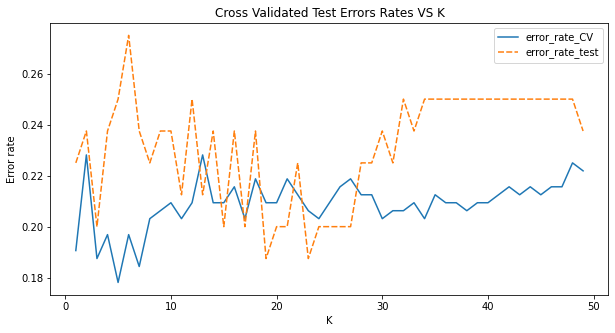

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated Test Errors Rates VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

# **Case Study: Practice dataset**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/markumreed/data_science_for_everyone/main/machine_learning_python/data/classified_data', index_col=0)

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
df.info() # missing data, very clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
pd.crosstab(df['TARGET CLASS'], df['TARGET CLASS'], normalize='all')*100

# Perfectly balanced. Maybe Thanos was the data engineer?
# This means we can rely on accuracy to evaluate our model

TARGET CLASS,0,1
TARGET CLASS,,
0,50.0,0.0
1,0.0,50.0


## EDA

In [ ]:
from scipy import stats

In [ ]:
df.groupby('TARGET CLASS').mean().T.head()

TARGET CLASS,0,1
WTT,0.790058,1.109305
PTI,1.234750,0.993855
EQW,1.008424,0.659830
SBI,0.675472,0.688727
LQE,1.082222,0.982451


In [ ]:
anova_df = pd.DataFrame(columns=['F-stat', 'p-value'])

for feat in df.drop('TARGET CLASS',axis=1):
  f,p = stats.f_oneway(df['TARGET CLASS'], df[feat])

  anova_df.loc[feat] = [round(f,3), round(p,6)]


anova_df.sort_values(by='F-stat', ascending=False).head()

,F-stat,p-value
NXJ,2549.317,0.0
HQE,1287.527,0.0
PTI,1192.906,0.0
PJF,980.160,0.0
LQE,915.612,0.0


### **Observations**
All features are highly dinstinct meaning a classification model would fit really well!

## Standardize Variables
* Must be comparable so needa scale to compute distnace without bias

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(df.drop(['TARGET CLASS'], axis=1))

StandardScaler()

In [ ]:
sc_ft = sc.transform(df.drop('TARGET CLASS', axis=1))

df_feat = pd.DataFrame(sc_ft, columns = df.drop('TARGET CLASS', axis=1).columns)
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Define and split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Fitting KNN with Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Fit KNN on training data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make prediction on testing data
y_hat = knn.predict(X_test)

## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_hat))

[[103   9]
 [  8 130]]


In [ ]:
# Print report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       112
           1       0.94      0.94      0.94       138

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



**Recall** is very high which means with 138 predictions to **1** we have made 94% of them correct



## Error Rate vs K

In [ ]:
error_rate_CV=[]
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    accuracy =  cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5 , scoring="accuracy")
    error_rate_CV.append(np.mean(1-accuracy))

optimal_k = pd.DataFrame({'error_rate_CV':error_rate_CV})


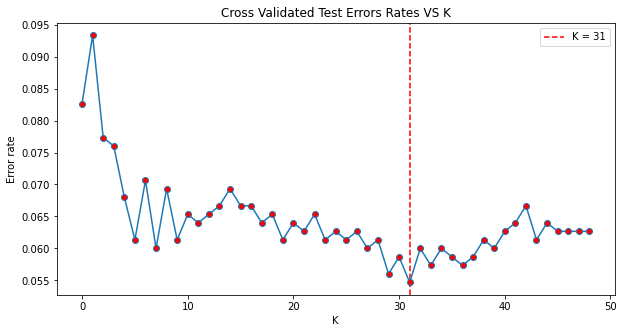

In [ ]:
opt_cv_k = np.argmin(error_rate_CV)

plt.figure(figsize=(10,5))

plt.axvline(x=opt_cv_k, color = 'red', ls='--', label=f"K = {opt_cv_k}")

plt.plot(optimal_k, marker='o', markersize=6, markerfacecolor='red')

plt.title('Cross Validated Test Errors Rates VS K')
plt.legend()
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()